In [ ]:
### take1 
# import data

In [8]:
#0.  Setup
# Numpy for working with Arrays
import numpy as np
# Pandas for working with data tables
import pandas as pd
# SciPy implements many different numerical algorithms
import scipy as sp
import scipy.stats as stats
# Module for plotting
import matplotlib
import matplotlib.pyplot as plt
# Module for linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf


---

## Part 1: Descriptive analysis

In [9]:
#load data from csv file
water_values = pd.read_csv('train_set_values.csv')
water_labels = pd.read_csv('train_set_labels.csv')


#examine data structures
print water_values.shape
#print train_values.dtypes
print water_labels.shape

#preview data
water_values.head()
water_labels.head()

(59400, 40)
(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [10]:
### merge values and labels
water = pd.merge(water_values, water_labels, on='id')
print water.shape
water.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [11]:
water.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [12]:
water_summary = water.describe(include='all')
water_summary
water[['extraction_type', 'extraction_type_group', 'extraction_type_class']].head().describe()
water[water.extraction_type != water.extraction_type_class].count()

id                       21426
amount_tsh               21426
date_recorded            21426
funder                   20642
gps_height               21426
installer                20623
longitude                21426
latitude                 21426
wpt_name                 21426
num_private              21426
basin                    21426
subvillage               21306
region                   21426
region_code              21426
district_code            21426
lga                      21426
ward                     21426
population               21426
public_meeting           20021
recorded_by              21426
scheme_management        19382
scheme_name               5058
permit                   20616
construction_year        21426
extraction_type          21426
extraction_type_group    21426
extraction_type_class    21426
management               21426
management_group         21426
payment                  21426
payment_type             21426
water_quality            21426
quality_

In [13]:
water['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

/Users/Amigo/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


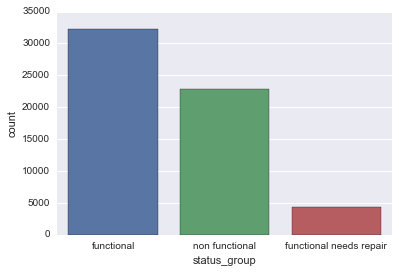

In [15]:
%matplotlib inline 
import seaborn as sns
#src https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html

#sns.barplot(x="status_group", y=train['status_group'].value_counts(), data=train)
#sns.barplot(x="status_group", y="quality_group", hue="quality_group",data=train)
sns.countplot(x="status_group", data=water)

In [ ]:
#naming conventions after splitting DD's train set into train and validation sets
water_train # thinking 80%
water_validate #thinking 20%
water_test #in final step, DD's test dataset